# Cours 3 - Les fonctions en Python

## Rappel du plan du cursus

__Cours 1__ : Variables, boucles et conditions

__Cours 2__ : Listes

__Cours 3__ : Fonctions

__Cours 4__ : Dictionnaires

__Cours 5__ : Votre premier programme

## Rappel des outils

*Pour suivre le cours en codant en temps réel*

- https://www.online-python.com/
- https://repl.it/ (plus complet mais nécessite la création d'un compte, ou l'utilisation d'un compte Google / Facebook)

# Les fonctions en python, qu'est-ce que c'est ?

- un morceau de code que l'on peut appeler en une ligne pour éviter de se répéter
- une boîte qui prend en entrée des *arguments* et ressort un *résultat*.

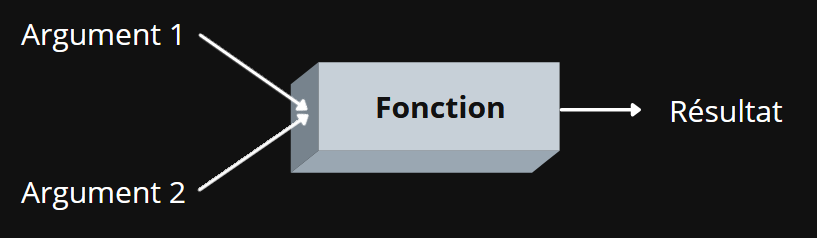

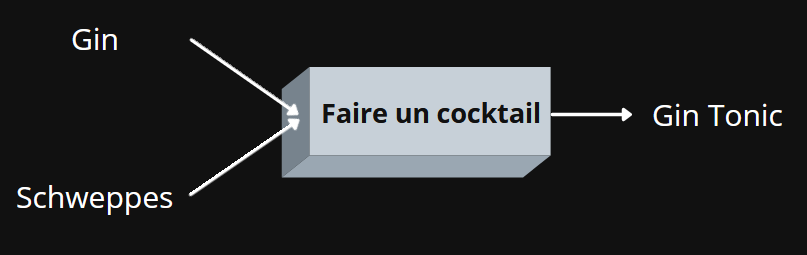

## Exemple de fonction

In [1]:
def faire_un_cocktail(ingrédient_1, ingrédient_2):
    if ingrédient_1 == "Gin" and ingrédient_2 == "Schweppes":
        return "Gin Tonic"
    elif ingrédient_1 == "Vodka" and ingrédient_2 == "Jus d'orange":
        return "Screwdriver"
    else:
        return "Ce n'est pas buvable..."
    
faire_un_cocktail("Gin", "Schweppes")

'Gin Tonic'

In [2]:
faire_un_cocktail("Vodka", "Jus d'orange")

'Screwdriver'

In [3]:
faire_un_cocktail("Vodka", "Whisky")

"Ce n'est pas buvable..."

## Les valeurs par défaut des arguments

Ou comment rendre un argument optionnel et lui donner une valeur par défaut.

In [4]:
def racine(nombre, degré=2):
    return nombre ** (1/degré)

racine(9)

3.0

In [5]:
racine(27, degré=3)

3.0

In [6]:
racine(nombre=27, degré=3)

3.0

## Attention à l'ordre des arguments nommés

Les arguments *nommés* ne peuvent pas préceder un argument *positionné* (non nommé).

In [10]:
racine(nombre=27, 3)

SyntaxError: positional argument follows keyword argument (<ipython-input-10-829fde213a27>, line 1)

In [11]:
def racine(degré=2, nombre):
    return nombre ** (1/degré)

SyntaxError: non-default argument follows default argument (<ipython-input-11-df93e5197ae0>, line 1)

## Un petit conseil...

Documentez vos fonctions !

In [ ]:
def racine(nombre, degré=2):
    """Retourne la racine n-ième de 'nombre'.
    
    Ex: retourne la racine carrée de 'nombre' si degré vaut 2.
    """ 
    return nombre ** (1/base)

# Mise en pratique : pierre-feuille-ciseau

Utilisons les fonctions pour écrire votre premier jeu !

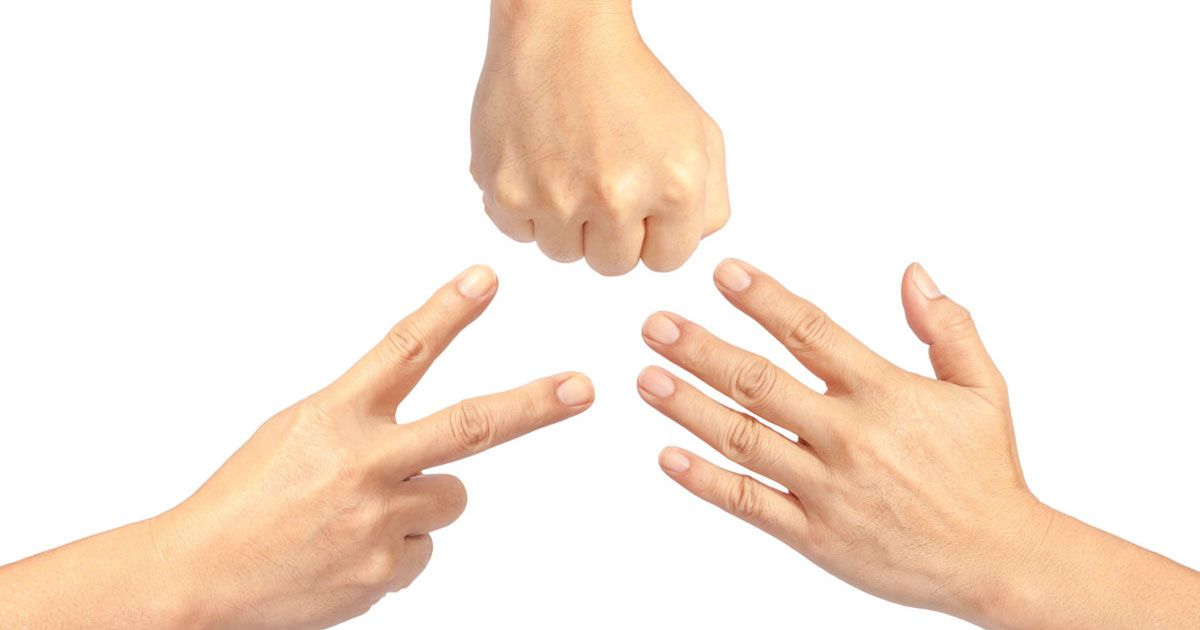

## Générer une réponse aléatoire

In [12]:
import random
random.seed()

def réponse_aléatoire():
    """Répond Pierre, Feuille ou Ciseau de manière aléatoire"""
    réponses = ["Pierre", "Feuille", "Ciseau"]
    return random.choice(réponses)

In [19]:
réponse_aléatoire()

'Pierre'

## Demander une réponse au joueur

In [20]:
def réponse_du_joueur():
    """Demande au joueur de choisir une réponse"""
    réponse = ""
    while réponse not in ["Pierre", "Feuille", "Ciseau"]:
        réponse = input("Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': ")
    return réponse

In [21]:
réponse_du_joueur()

Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': ?
Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre


'Pierre'

## Déterminer qui gagne

- Match nul si les deux réponses sont les mêmes
- Pierre gagne contre Ciseau
- Ciseau gagne contre Feuille
- Feuille gagne contre Pierre

In [22]:
def trouver_gagnant(réponse_joueur, réponse_ordinateur):
    """Compare les deux réponses pour trouver qui gagne"""
    # traiter le cas du match nul
    if réponse_joueur == réponse_ordinateur:
        résultat = "égalité"
    # traiter les autres cas
    elif réponse_joueur == "Pierre":
        résultat = "joueur" if réponse_ordinateur == "Ciseau" else "ordinateur"
    elif réponse_joueur == "Ciseau":
        résultat = "joueur" if réponse_ordinateur == "Feuille" else "ordinateur"
    elif réponse_joueur == "Feuille":
        résultat = "joueur" if réponse_ordinateur == "Pierre" else "ordinateur"
    
    return résultat

In [23]:
trouver_gagnant("Pierre", "Ciseau")

'joueur'

In [24]:
trouver_gagnant("Pierre", "Feuille")

'ordinateur'

In [25]:
trouver_gagnant("Pierre", "Pierre")

'égalité'

## Le jeu complet !

Il est temps d'assembler les différentes fonctions

In [26]:
nombre_de_tours = 5
for tour in range(nombre_de_tours):
    réponse_ordinateur = réponse_aléatoire()
    réponse_joueur = réponse_du_joueur()
    gagnant = trouver_gagnant(réponse_joueur, réponse_ordinateur)
    print(f"Votre adversaire a choisi : {réponse_ordinateur}")
    
    if gagnant == "joueur":
        print("Vous avez gagné un tour, bravo !")
    elif gagnant == "ordinateur":
        print("Perdu ! Dommage...")
    else:
        print("Match nul ! C'est serré !")

Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre
Votre adversaire a choisi : Pierre
Match nul ! C'est serré !
Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Ciseau
Votre adversaire a choisi : Feuille
Vous avez gagné un tour, bravo !
Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre
Votre adversaire a choisi : Ciseau
Vous avez gagné un tour, bravo !
Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre
Votre adversaire a choisi : Feuille
Perdu ! Dommage...
Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Feuille
Votre adversaire a choisi : Ciseau
Perdu ! Dommage...


## Ecrire une gestion des scores

Pour toujours plus de fun !

In [27]:
def gérer_scores(gagnant, scores):
    """Met à jour la liste de scores en fonction du gagnant du tour"""
    
    if gagnant == "joueur":
        scores[0] += 1
        print("Vous avez gagné un tour, bravo !")
    elif gagnant == "ordinateur":
        scores[1] += 1
        print("Perdu ! Dommage...")
    else:
        print("Match nul ! C'est serré !")
        
    print(f"Score : Joueur {scores[0]} - {scores[1]} Ordinateur\n")

In [28]:
def afficher_score_final(scores):
    # évident, pas de docstring ici
    print("=====================================")
    print(f"SCORE FINAL : Joueur {scores[0]} - {scores[1]} Ordinateur")
    print("=====================================")

## Ajouter la gestion des scores au jeu

In [29]:
nombre_de_tours = 5
scores = [0, 0]
for tour in range(nombre_de_tours):
    réponse_ordinateur = réponse_aléatoire()
    réponse_joueur = réponse_du_joueur()
    gagnant = trouver_gagnant(réponse_joueur, réponse_ordinateur)
    print(f"Votre adversaire a choisi : {réponse_ordinateur}")
    gérer_scores(gagnant, scores)
    
afficher_score_final(scores)

Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre
Votre adversaire a choisi : Feuille
Perdu ! Dommage...
Score : Joueur 0 - 1 Ordinateur

Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre
Votre adversaire a choisi : Feuille
Perdu ! Dommage...
Score : Joueur 0 - 2 Ordinateur

Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre
Votre adversaire a choisi : Pierre
Match nul ! C'est serré !
Score : Joueur 0 - 2 Ordinateur

Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre
Votre adversaire a choisi : Pierre
Match nul ! C'est serré !
Score : Joueur 0 - 2 Ordinateur

Veuillez choisir entre 'Pierre', 'Feuille' et 'Ciseau': Pierre
Votre adversaire a choisi : Ciseau
Vous avez gagné un tour, bravo !
Score : Joueur 1 - 2 Ordinateur

SCORE FINAL : Joueur 1 - 2 Ordinateur


## Idées d'améliorations pour vous entrainer

- Au lieu d'avoir un nombre de tours fixe, implémenter une fonctionnalité "premier à X" (ex: "premier à 3" ou "premier à 5")
- Modifier la probabilité que l'ordinateur choisisse une réponse (lien utile : https://docs.python.org/fr/3/library/random.html)
- Ajouter des multiplicateurs de score (par exemple le dernier tour peut compter double ou triple dans le score).